<img src = "https://drive.google.com/uc?export=view&id=1WaM3ez8iLaUk3VyWNYZQuifnvbEX4vbK" alt = "Encabezado MLDS" width = "100%">  </img>



# **Entendimiento de los datos con *pandas* II**
---
<img src = "https://pandas.pydata.org/static/img/pandas.svg" alt = "pandas Logo" width = "70%">  </img>



En este material se explorarán las tareas de entendimiento de datos basadas en la descripción de conjuntos de datos. Para esto, se toma como referencia la exploración de conjuntos de datos mediante **estadística descriptiva** y **visualización básica de datos**, como complemento de las utilidades generales de descripción de *pandas*.

In [1]:
import numpy as np
import pandas as pd

In [2]:
!python --version
print('NumPy', np.__version__)
print('pandas', pd.__version__)

Python 3.11.5
NumPy 1.25.2
pandas 2.1.0


Este material fue realizado con las siguientes versiones:

- Python 3.10.6
- NumPy 1.22.4
- pandas 1.5.3


## **5. Descripciones generales**
---

Ya tenemos a nuestra disposición herramientas para cargar y generar conjuntos de datos tabulares en forma de objetos *DataFrame* y *Series*. Con ellos podemos realizar muchas tareas, pero antes de comenzar se recomienda siempre realizar un proceso de **exploración de los datos**. Esto se refiere al proceso que nos permite conocer y entender los datos de forma preliminar. Los atributos de los objetos son una herramienta maravillosa para empezar con esta tarea, pero son insuficientes para conocer el detalle de los datos, sobre todo en conjuntos grandes.

*Pandas* ofrece herramientas para realizar esta exploración previa. Inicialmente, presentaremos las herramientas más generales y comunes en este proceso.

> El resto de este material se realizará tomando como referencia el [*dataset* de *Kaggle*](https://www.kaggle.com/crawford/80-cereals) correspondiente a la información nutricional de un listado de 80 cereales.

In [90]:
url = 'https://drive.google.com/uc?export=download&id=1cVDBakqy6tSwCwgzAtf08hNvjHk8a6hv'

df = pd.read_csv(url)

* **`[df|series].info()`:** El método **`.info()`** se ajusta perfectamente a esta descripción pues permite generar un vistazo inicial a la información general del conjunto de datos de interés. Entre esta información se incluyen:

  *  Nombre de las columnas.
  *  Tipos de dato (**`dtypes`**) por columna.
  *  Número de columnas y de filas.
  *  Número de valores faltantes por columna.
  *  Uso de memoria.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cereal Name            74 non-null     object 
 1   Manufacturer           74 non-null     object 
 2   Type                   74 non-null     object 
 3   Calories               74 non-null     int64  
 4   Protein (g)            74 non-null     int64  
 5   Fat                    74 non-null     int64  
 6   Sodium                 74 non-null     int64  
 7   Dietary Fiber          74 non-null     float64
 8   Carbs                  74 non-null     float64
 9   Sugars                 74 non-null     int64  
 10  Display Shelf          74 non-null     int64  
 11  Potassium              74 non-null     int64  
 12  Vitamins and Minerals  74 non-null     int64  
 13  Serving Size Weight    74 non-null     float64
 14  Cups per Serving       74 non-null     float64
dtypes: float

* **`[df|series].describe()`:** El método **`.describe()`** realiza un resumen de las estadísticas descriptivas más comunes por columna. La **estadística descriptiva** se verá en la siguiente sección. Estos son:

  *  Conteo de valores no nulos. **`count`**
  *  Media aritmética. **`mean`**
  *  Desviación estándar. **`std`**
  *  Máximo y mínimo. **`max`** | **`min`**
  *  Cuartiles 1, 2 y 3. **`25%`** | **`50%`** | **`75%`**



In [5]:
df.describe()

,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,105.540541,2.500000,0.945946,160.675676,2.090541,14.594595,6.770270,2.175676,92.675676,28.378378,1.027432,0.629054
std,18.442201,1.088546,0.963610,85.188447,2.404002,4.349205,4.467684,0.833512,70.578065,22.787104,0.151260,0.576843
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,0.500000,-1.000000
25%,100.000000,2.000000,0.000000,131.250000,0.250000,12.000000,3.000000,1.000000,40.000000,25.000000,1.000000,0.670000
50%,110.000000,2.000000,1.000000,180.000000,1.500000,14.000000,6.000000,2.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,1.000000,217.500000,3.000000,17.000000,10.750000,3.000000,113.750000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,3.000000,330.000000,100.000000,1.500000,1.500000


* **`[df|series].head(n)` | `[df|series].tail(n)`:** Cuando se realiza una exploración inicial, no es conveniente imprimir en pantalla todos los registros de un conjunto de datos. Para esto se dispone de las funciones **`head(n)`** y **`tail(n)`**, que retornan un subconjunto de los primeros (para **`head`**) o últimos (para **`tail`**) $n$ registros de un objeto *DataFrame* o *Series*. Por defecto, si no se pasa el argumento **`n`** se imprimen los primeros/últimos $5$ registros.


In [6]:
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


In [7]:
df.head(2)

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00


In [8]:
df.tail()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
69,Triples,General Mills,C,110,2,1,250,0.0,21.0,3,3,60,25,1.0,0.75
70,Trix,General Mills,C,110,1,1,140,0.0,13.0,12,2,25,25,1.0,1.00
71,Wheat_Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3,1,115,25,1.0,0.67
72,Wheaties,General Mills,C,100,3,1,200,3.0,17.0,3,1,110,25,1.0,1.00
73,Wheaties_Honey_Gold,General Mills,C,110,2,1,200,1.0,16.0,8,1,60,25,1.0,0.75


In [9]:
df.tail(10)

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
64,Special_K,Kelloggs,C,110,6,0,230,1.0,16.0,3,1,55,25,1.0,1.00
65,Strawberry_Fruit_Wheats,Nabisco,C,90,2,0,15,3.0,15.0,5,2,90,25,1.0,-1.00
66,Total_Corn_Flakes,General Mills,C,110,2,1,200,0.0,21.0,3,3,35,100,1.0,1.00
67,Total_Raisin_Bran,General Mills,C,140,3,1,190,4.0,15.0,14,3,230,100,1.5,1.00
68,Total_Whole_Grain,General Mills,C,100,3,1,200,3.0,16.0,3,3,110,100,1.0,1.00
69,Triples,General Mills,C,110,2,1,250,0.0,21.0,3,3,60,25,1.0,0.75
70,Trix,General Mills,C,110,1,1,140,0.0,13.0,12,2,25,25,1.0,1.00
71,Wheat_Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3,1,115,25,1.0,0.67
72,Wheaties,General Mills,C,100,3,1,200,3.0,17.0,3,1,110,25,1.0,1.00
73,Wheaties_Honey_Gold,General Mills,C,110,2,1,200,1.0,16.0,8,1,60,25,1.0,0.75


* **`[df|series].sample(n)`:** Similar a los métodos **`head`** y **`tail`**, el método **`sample(n)`** genera un subconjunto de entradas aleatorias de los datos de tamaño **n**.


In [10]:
df.sample(5)
# Si ejecutamos esta celda varias veces, cada vez obtendremos una muestra diferente

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
5,Apple_Cinnamon_Cheerios,General Mills,C,110,2,2,180,1.5,10.5,10,1,70,25,1.0,0.75
25,Frosted_Flakes,Kelloggs,C,110,1,0,200,1.0,14.0,11,1,25,25,1.0,0.75
44,Multi-Grain_Cheerios,General Mills,C,100,2,1,220,2.0,15.0,6,1,90,25,1.0,1.00
22,Crispy_Wheat_&_Raisins,General Mills,C,100,2,1,140,2.0,11.0,10,3,120,25,1.0,0.75
41,Lucky_Charms,General Mills,C,110,2,1,180,0.0,12.0,12,2,55,25,1.0,1.00


In [12]:
# Los números aleatorios son generados con el módulo random de NumPy.
np.random.seed(123) # Cambiar la semilla afecta también a las funciones aleatorias de pandas.
# Si plantamos una semilla, tendremos el mismo resultado al ejecutar esta celda varias veces.
# Esto es muy útil para garantizar la reproducibilidad de resultados en algunos experimentos.
df.sample(6)

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
67,Total_Raisin_Bran,General Mills,C,140,3,1,190,4.0,15.0,14,3,230,100,1.50,1.0
53,Quaker_Oat_Squares,Quaker Oats,C,100,4,1,135,2.0,14.0,6,3,110,25,1.00,0.5
60,Shredded_Wheat,Nabisco,C,80,2,0,0,3.0,16.0,0,1,95,0,0.83,-1.0
52,Puffed_Wheat,Quaker Oats,C,50,2,0,0,1.0,10.0,0,3,50,0,0.50,-1.0
51,Puffed_Rice,Quaker Oats,C,50,1,0,0,0.0,13.0,0,3,15,0,0.50,1.0
64,Special_K,Kelloggs,C,110,6,0,230,1.0,16.0,3,1,55,25,1.00,1.0


* **`[df|series].nlargest(n, columns)` | `[df|series].nsmallest(n, columns)`:** Además de las funciones mencionadas anteriormente, *pandas* ofrece los métodos **`nlargest`** y **`nsmallest`**, que permite obtener un subconjunto de los datos cuyos valores en determinada columna sean los mayores y menores, respectivamente. Se tiene que definir las columnas sobre las que realizar el cálculo.


In [13]:
df.nlargest(3, 'Calories') # Sobre una única columna.

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
43,Mueslix_Crispy_Blend,Kelloggs,C,160,3,2,150,3.0,17.0,13,3,160,25,1.50,0.67
38,Just_Right_Fruit_&_Nut,Kelloggs,C,140,3,1,170,2.0,20.0,9,3,95,100,1.30,0.75
46,Nutri-Grain_Almond-Raisin,Kelloggs,C,140,3,2,220,3.0,21.0,7,3,130,25,1.33,0.67


In [15]:
df.nsmallest(5, ['Calories', 'Sodium']) # Las columnas pueden ser una lista de índices.

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
51,Puffed_Rice,Quaker Oats,C,50,1,0,0,0.0,13.0,0,3,15,0,0.5,1.00
52,Puffed_Wheat,Quaker Oats,C,50,2,0,0,1.0,10.0,0,3,50,0,0.5,-1.00
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33


* **`[df|series].idxmax(n)` | `[df|series].idxmin(n)`:** *Pandas* hereda muchos de los métodos de *NumPy* como **`max`** y **`min`**, que se discutirán más adelante en la sección de estadística descriptiva. Los equivalentes a los métodos **`argmax`** y **`argmin`** de *NumPy* en *pandas* son los métodos **`idxmax`** y **`idxmin`** que extienden su utilidad al permitir retornar el índice de *pandas*, que no es necesariamente numérico como en *NumPy*.


In [20]:
df['Sodium'].idxmax() #Posición de los máximos por columna

50

In [23]:
df.iloc[49]

Cereal Name              Post_Nat._Raisin_Bran
Manufacturer                              Post
Type                                         C
Calories                                   120
Protein (g)                                  3
Fat                                          1
Sodium                                     200
Dietary Fiber                              6.0
Carbs                                     11.0
Sugars                                      14
Display Shelf                                3
Potassium                                  260
Vitamins and Minerals                       25
Serving Size Weight                       1.33
Cups per Serving                          0.67
Name: 49, dtype: object

In [24]:
df['Sugars'].idxmin()  #Etiqueta del índice con el valor mínimo de la serie.

54

In [25]:
df.iloc[53]

Cereal Name              Quaker_Oat_Squares
Manufacturer                    Quaker Oats
Type                                      C
Calories                                100
Protein (g)                               4
Fat                                       1
Sodium                                  135
Dietary Fiber                           2.0
Carbs                                  14.0
Sugars                                    6
Display Shelf                             3
Potassium                               110
Vitamins and Minerals                    25
Serving Size Weight                     1.0
Cups per Serving                        0.5
Name: 53, dtype: object

* **`[df|series].unique()` | `[df|series].nunique()` | `[df|series].value_counts()`:** Cuando se trata con variables categóricas, es necesario encontrar información acerca de las categorías posibles que puede tomar una variable. Para esto *pandas* dispone de métodos para identificar un arreglo con estas categorías (**`unique`**), identificar el número total de categorías posibles (**`nunique`**) o evaluar el conteo de valores por cada categoría (**`value_counts`**).


In [26]:
df['Manufacturer'].unique()

array(['Nabisco', 'Quaker Oats', 'Kelloggs', 'Ralston Purina',
       'General Mills', 'Post', 'American Home Food Products'],
      dtype=object)

In [27]:
df['Manufacturer'].nunique()

7

In [28]:
df['Manufacturer'].value_counts()

Manufacturer
Kelloggs                       23
General Mills                  22
Quaker Oats                     8
Post                            8
Nabisco                         6
Ralston Purina                  6
American Home Food Products     1
Name: count, dtype: int64

In [29]:
df['Type'].unique()

array(['C', 'H'], dtype=object)

In [31]:
df['Type'].nunique()

2

In [32]:
df['Type'].value_counts()

Type
C    71
H     3
Name: count, dtype: int64

## **6. Estadística descriptiva**
---
La **estadística descriptiva** es el área de la estadística que se encarga de organizar, presentar y describir los datos de forma cuantitativa con el propósito de facilitar su uso. Con ella se cálculan medidas a partir de los datos, que buscan representar numéricamente características generales de los datos.

*Pandas* ofrece la posibilidad de calcular algunas de estas estadísticas de manera directa, a partir de objetos *DataFrame* y *Series*. A continuación presentamos las funciones principales de medidas de estadística descriptiva que abarca *pandas*.


### **6.1. Medidas de posición**
---

Las medidas de posición son medidas estadísticas que caracterizan la posición y distribución general de los datos de manera cuantitativa. Consideramos dos categorías principales: medidas de tendencia central y cuantiles.

#### **6.1.1. Medidas de tendencia central**
---

Estas medidas representan características generales y centrales en los datos. Las medidas de tendencia central más importantes, y aquellas que son descritas en conjunto usualmente son:
* **Media aritmética o promedio.** Valor medio del conjunto, resultado de la suma de todos los valores dividido entre la cantidad total. No está definido en variables ordinales.
> **`.mean()`**
* **Moda.** Elemento o elementos que más se repiten en el conjunto.
> **`.mode()`**
* **Mediana.** Elemento central en el conjunto ordenado.
>**`.median()`**

> Nota: `numeric_only` indica que solo se tenga en cuenta las columnas con valores numéricos

In [33]:
df.mean(numeric_only=True)   #Media aritmética

Calories                 105.540541
Protein (g)                2.500000
Fat                        0.945946
Sodium                   160.675676
Dietary Fiber              2.090541
Carbs                     14.594595
Sugars                     6.770270
Display Shelf              2.175676
Potassium                 92.675676
Vitamins and Minerals     28.378378
Serving Size Weight        1.027432
Cups per Serving           0.629054
dtype: float64

In [36]:
df.median(numeric_only=True) #Mediana

Calories                 110.00
Protein (g)                2.00
Fat                        1.00
Sodium                   180.00
Dietary Fiber              1.50
Carbs                     14.00
Sugars                     6.00
Display Shelf              2.00
Potassium                 90.00
Vitamins and Minerals     25.00
Serving Size Weight        1.00
Cups per Serving           0.75
dtype: float64

In [37]:
df['Calories'].mode()   #Moda. Pueden ser varios valores.

0    110
Name: Calories, dtype: int64

#### **6.1.2. Cuantiles**
---
 Los cuantiles son medidas de posición no central que permiten ilustrar la división de una distribución entre un número de grupos equidistantes de muestras. Los cuartiles, los deciles y los percentiles son los cuantiles más comunes. Otra medida importante es el rango intercuartílico, que es la diferencia entre los cuartiles $1$ y $3$, es decir, el área central que contiene el $50\%$ de los datos.

  Es posible calcularlos con la función:

  > **`.quantile(q)`**

  El argumento **`q`** es la posición, entre 0 y 1, del cuantil o cuantiles a calcular.

In [38]:
df['Potassium'].quantile(0.5) #Equivale a la mediana

90.0

In [39]:
df['Potassium'].quantile([0.25, 0.5, 0.75]) # Calcular varios cuantiles en un solo llamado.

0.25     40.00
0.50     90.00
0.75    113.75
Name: Potassium, dtype: float64

### **6.2. Medidas de forma**
---

Otro tipo de medida es aquella que busca describir numéricamente la forma de una distribución. Si se graficara la distribución de los datos ordenados (como se verá en la siguiente sección) se podría identificar patrones en la forma de la función que describen, significando concentraciones de datos comunes o tendencias.

#### **6.2.1. Curtosis**
---
 La curtosis es una medida cuantitativa que representa la forma de una distribución y, en particular, de su apuntamiento y el grosor de sus picos, que refleja la concentración de los valores cerca de la media.
Al igual que antes, es posible calcularlo directamente al llamar el siguiente método:

  > **`.kurt()`** | **`.kurtosis()`**

In [40]:
df['Fat'].kurt()

3.102958320064024

In [41]:
df['Fat'].kurtosis() # Las dos funciones son equivalentes.

3.102958320064024

#### **6.2.2. Asimetría o *skewness***
---
 La asimetría o *skewness* es la medida que representa la concentración o sesgo de los datos centrales de una distribución en una dirección particular. Está estrechamente relacionada con el orden de las medidas de tendencia central. Si los valores se concentran a la izquierda de la media se considera una asimetría **positiva**; y si se concentran a la derecha, se considera una asimetría **negativa**. En datos simétricos, el valor de la medida de asimetría es cero.

  > **`.skew()`**


In [44]:
#Las calorías parecen estar concentradas en valores altos, cercanos al máximo.

df['Calories'].skew()

-0.687461119816612

### **6.3. Medidas de dispersión**
---

Las medidas de dispersión son medidas que reflejan la distancia media de los valores de las medidas de tendencia central como la media aritmética. Si la dispersión de los valores es alta, los valores calculados de las medidas de tendencia central no pueden caracterizar correctamente, por sí solos, a todo el conjunto.

#### **6.3.1. Desviación estándar y varianza**
---
 La desviación estándar y la varianza son las medidas principales de dispersión. Representan la variación o distancia de los datos de una distribución respecto a su media aritmética. La varianza es el cuadrado de la desviación estándar, que es ampliamente usada en el análisis de datos junto a la media.

  Se pueden calcular directamente con los siguientes métodos:

  **Varianza:**
  > **`.var()`**

  **Desviación estándar:**
  > **`.std()`**

In [46]:
df.std(numeric_only=True)

Calories                 18.442201
Protein (g)               1.088546
Fat                       0.963610
Sodium                   85.188447
Dietary Fiber             2.404002
Carbs                     4.349205
Sugars                    4.467684
Display Shelf             0.833512
Potassium                70.578065
Vitamins and Minerals    22.787104
Serving Size Weight       0.151260
Cups per Serving          0.576843
dtype: float64

In [47]:
df.var(numeric_only=True)

Calories                  340.114772
Protein (g)                 1.184932
Fat                         0.928545
Sodium                   7257.071455
Dietary Fiber               5.779224
Carbs                      18.915587
Sugars                     19.960200
Display Shelf               0.694743
Potassium                4981.263236
Vitamins and Minerals     519.252129
Serving Size Weight         0.022880
Cups per Serving            0.332748
dtype: float64

In [52]:
df['Sodium'].std() ** 2 # La varianza es el cuadrado de la desviación estándar.

7257.071455016661

In [53]:
df.std(numeric_only=True) ** 2 

Calories                  340.114772
Protein (g)                 1.184932
Fat                         0.928545
Sodium                   7257.071455
Dietary Fiber               5.779224
Carbs                      18.915587
Sugars                     19.960200
Display Shelf               0.694743
Potassium                4981.263236
Vitamins and Minerals     519.252129
Serving Size Weight         0.022880
Cups per Serving            0.332748
dtype: float64

#### **6.3.2. Rango, máximo y mínimo**
---
 Otra forma de representar la dispersión de un conjunto de datos es considerando sus valores extremos. Para esto, se suele calcular la diferencia entre el valor máximo y el valor mínimo. Esta medida se llama **rango** y su magnitud refleja de cierta manera la dispersión de los datos. Este rango es similar al rango intercuartílico, que es más recomendado cuando los valores extremos pueden contener valores atípicos.

  El rango no se calcula directamente con un método en *pandas*, pero puede calcularse fácilmente con el mínimo y máximo de un conjunto de datos.

  **Mínimo:**
  > **`.min()`**

  **Máximo:**
  > **`.min()`**

Estas medidas son heredadas de *NumPy*.

In [54]:
df['Calories'].min()

50

In [55]:
df['Calories'].max()

160

In [56]:
#Rango. Calculado a partir del máximo y mínimo.
df['Calories'].max() - df['Calories'].min()

110

Todas las funciones descritas están disponibles tanto para objetos *DataFrame*, *Series* y *GroupBy*. Son muy útiles para realizar operaciones de agregación en objetos agrupados.

In [57]:
df.groupby('Manufacturer').mean(numeric_only=True)

,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
Manufacturer,,,,,,,,,,,,
American Home Food Products,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,2.000000,95.000000,25.000000,1.000000,-1.000000
General Mills,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,2.136364,85.227273,35.227273,1.049091,0.875000
Kelloggs,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,2.347826,103.043478,34.782609,1.077826,0.622174
Nabisco,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,1.666667,120.666667,8.333333,0.971667,0.111667
Post,107.500000,2.375000,0.750000,144.375000,2.500000,13.375000,8.625000,2.375000,103.125000,25.000000,1.041250,0.720000
Quaker Oats,95.000000,2.625000,1.750000,92.500000,1.337500,10.000000,5.250000,2.375000,74.375000,12.500000,0.875000,0.323750
Ralston Purina,103.333333,2.000000,0.666667,223.333333,1.500000,18.166667,4.500000,1.666667,62.333333,25.000000,1.000000,0.828333


In [58]:
df.groupby('Manufacturer').describe()

Calories                                       \
                               count        mean        std    min    25%   
Manufacturer                                                                
American Home Food Products      1.0  100.000000        NaN  100.0  100.0   
General Mills                   22.0  111.363636  10.371873  100.0  110.0   
Kelloggs                        23.0  108.695652  22.218818   50.0  100.0   
Nabisco                          6.0   86.666667  10.327956   70.0   82.5   
Post                             8.0  107.500000  10.350983   90.0  100.0   
Quaker Oats                      8.0   95.000000  29.277002   50.0   87.5   
Ralston Purina                   6.0  103.333333   8.164966   90.0  100.0   

                                                 Protein (g)            ...  \
                               50%    75%    max       count      mean  ...   
Manufacturer                                                            ...   
American Home Food Products  100.0  100.0  100.0         1.0  4.000000  ...   
General Mills                110.0  110.0  140.0        22.0  2.318182  ...   
Kelloggs                     110.0  115.0  160.0        23.0  2.652174  ...   
Nabisco                       90.0   90.0  100.0         6.0  2.833333  ...   
Post                         110.0  112.5  120.0         8.0  2.375000  ...   
Quaker Oats                  100.0  120.0  120.0         8.0  2.625000  ...   
Ralston Purina               105.0  110.0  110.0         6.0  2.000000  ...   

                            Serving Size Weight       Cups per Serving  \
                                            75%   max            count   
Manufacturer                                                             
American Home Food Products                 1.0  1.00              1.0   
General Mills                               1.0  1.50             22.0   
Kelloggs                                    1.0  1.50             23.0   
Nabisco                                     1.0  1.00              6.0   
Post                                        1.0  1.33              8.0   
Quaker Oats                                 1.0  1.00              8.0   
Ralston Purina                              1.0  1.00              6.0   

                                                                              \
                                 mean       std   min     25%    50%     75%   
Manufacturer                                                                   
American Home Food Products -1.000000       NaN -1.00 -1.0000 -1.000 -1.0000   
General Mills                0.875000  0.240906  0.50  0.7500  0.875  1.0000   
Kelloggs                     0.622174  0.549429 -1.00  0.5850  0.750  1.0000   
Nabisco                      0.111667  0.886779 -1.00 -0.6675  0.500  0.6700   
Post                         0.720000  0.338526  0.25  0.5850  0.710  0.8800   
Quaker Oats                  0.323750  0.834248 -1.00  0.1250  0.670  0.8125   
Ralston Purina               0.828333  0.191250  0.67  0.6900  0.750  0.9375   

                                   
                              max  
Manufacturer                       
American Home Food Products -1.00  
General Mills                1.50  
Kelloggs                     1.00  
Nabisco                      1.00  
Post                         1.33  
Quaker Oats                  1.00  
Ralston Purina               1.13  

[7 rows x 96 columns]

In [59]:
df.groupby('Manufacturer').count() #Este argumento permite contar el número de apariciones de cada valor, similar a value_counts.

,Cereal Name,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
Manufacturer,,,,,,,,,,,,,,
American Home Food Products,1,1,1,1,1,1,1,1,1,1,1,1,1,1
General Mills,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Kelloggs,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Nabisco,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Post,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Quaker Oats,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Ralston Purina,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [ ]:
#La desviación estándar no está definida si hay menos de dos elementos en el conjunto.
df.groupby('Manufacturer').std(numeric_only=True)

### **6.4. Medidas multivariadas**
---

Las medidas descritas hasta el momento solo son calculadas independientemente en cada variable. Es así, que al evaluar estos métodos en objetos *DataFrame* se genera una serie con el valor calculado por cada columna o variable.

Para sacar un mejor provecho de las capacidades computacionales de *pandas* se consideran métodos y herramientas matemáticas para calcular medidas que caractericen la relación entre dos o más variables, representadas como las columnas de un *DataFrame*.

#### **6.4.1. Correlación y covarianza**
---

Una manera de caracterizar numéricamente relaciones entre los datos es mediante las medidas multivariadas de la **covarianza** y de los **coeficientes de correlación**. Estas, representan la dependencia y variación conjunta de dos variables numéricas continuas. Son importantes para identificar relaciones ocultas entre características de los datos de interés.

  Se calculan con los siguientes métodos:

  **Covarianza:**

  > **`.cov()`**

  **Coeficientes de correlación**

  > **`.corr(method)`**

  El argumento **`method`** define el tipo de coeficiente que se desea calcular.

> **Nota:** Los coeficientes de correlación se explorarán en detalle en la **Unidad 3**.

In [61]:
df.cov(numeric_only=True) # Matriz de covarianza entre cada variable.

,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
Calories,340.114772,-1.438356,7.563865,556.479082,-15.782488,20.564606,45.125879,0.520178,-206.945576,124.861163,2.117160,2.929970
Protein (g),-1.438356,1.184932,0.150685,-3.698630,1.304795,-0.678082,-1.856164,0.089041,40.890411,0.342466,0.036781,-0.084863
Fat,7.563865,0.150685,0.928545,1.612366,-0.047094,-1.467419,0.987412,0.174010,8.776749,-0.499815,0.032325,-0.061148
Sodium,556.479082,-3.698630,1.612366,7257.071455,-13.788041,134.387264,43.650500,-4.229915,-124.572381,701.453165,4.023676,23.293799
Dietary Fiber,-15.782488,1.304795,-0.047094,-13.788041,5.779224,-3.712107,-1.781655,0.563328,153.809219,-1.577194,0.084263,-0.249941
Carbs,20.564606,-0.678082,-1.467419,134.387264,-3.712107,18.915587,-6.614957,-0.379859,-110.201777,25.703443,0.099561,0.424269
Sugars,45.125879,-1.856164,0.987412,43.650500,-1.781655,-6.614957,19.960200,0.260089,-6.007034,13.457979,0.307484,0.591971
Display Shelf,0.520178,0.089041,0.174010,-4.229915,0.563328,-0.379859,0.260089,0.694743,19.441318,5.905220,0.023060,-0.118462
Potassium,-206.945576,40.890411,8.776749,-124.572381,153.809219,-110.201777,-6.007034,19.441318,4981.263236,45.973713,4.387923,-7.785653
Vitamins and Minerals,124.861163,0.342466,-0.499815,701.453165,-1.577194,25.703443,13.457979,5.905220,45.973713,519.252129,1.128656,1.352555


In [62]:
df.corr(numeric_only=True) # Matriz de correlación entre cada variable.

,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
Calories,1.000000,-0.071648,0.425627,0.354206,-0.355982,0.256388,0.547685,0.033840,-0.158991,0.297116,0.758956,0.275418
Protein (g),-0.071648,1.000000,0.143655,-0.039885,0.498610,-0.143227,-0.381669,0.098137,0.532237,0.013806,0.223383,-0.135149
Fat,0.425627,0.143655,1.000000,0.019642,-0.020329,-0.350141,0.229358,0.216651,0.129051,-0.022762,0.221775,-0.110007
Sodium,0.354206,-0.039885,0.019642,1.000000,-0.067327,0.362717,0.114690,-0.059572,-0.020719,0.361351,0.312261,0.474025
Dietary Fiber,-0.355982,0.498610,-0.020329,-0.067327,1.000000,-0.355039,-0.165885,0.281135,0.906521,-0.028791,0.231728,-0.180237
Carbs,0.256388,-0.143227,-0.350141,0.362717,-0.355039,1.000000,-0.340435,-0.104785,-0.359012,0.259354,0.151341,0.169112
Sugars,0.547685,-0.381669,0.229358,0.114690,-0.165885,-0.340435,1.000000,0.069844,-0.019051,0.132193,0.455005,0.229700
Display Shelf,0.033840,0.098137,0.216651,-0.059572,0.281135,-0.104785,0.069844,1.000000,0.330479,0.310910,0.182904,-0.246381
Potassium,-0.158991,0.532237,0.129051,-0.020719,0.906521,-0.359012,-0.019051,0.330479,1.000000,0.028586,0.411022,-0.191235
Vitamins and Minerals,0.297116,0.013806,-0.022762,0.361351,-0.028791,0.259354,0.132193,0.310910,0.028586,1.000000,0.327452,0.102898


#### **6.4.2. Tablas de contingencia**
---
 Las tablas de contingencia son un método más tradicional usado para representar la relación entre dos variables, comúnmente, cualitativas o categóricas. En esta tabla se caracterizan los conjuntos que comparten propiedades con cálculos como la frecuencia o la media aritmética.

  Se calcula con el método:

  > **`pd.crosstab(index, columns, ...)`**


Por defecto se usa la frecuencia. Es decir, la cantidad de registros cuyo valor corresponda a ambas categorías. El argumento **`margins`** permite calcular un resumen general por filas y columnas.

In [63]:
df["Manufacturer"].value_counts()

Manufacturer
Kelloggs                       23
General Mills                  22
Quaker Oats                     8
Post                            8
Nabisco                         6
Ralston Purina                  6
American Home Food Products     1
Name: count, dtype: int64

In [ ]:
df.loc[df["Manufacturer"] == "American Home Food Products",["Manufacturer", "Calories"]]

In [ ]:
pd.crosstab(df['Manufacturer'], df['Calories'], margins = True)

También se pueden definir funciones de agregación para las categorías que correspondan. Una función de agregación es un cálculo proveniente de todos los datos, como el máximo, la suma o el producto. Se específica con una función en el argumento **`aggfunc`**. Cuando se define, se tiene que definir la variable sobre la cual hacer la agregación en el argumento **`values`**.

In [ ]:
pd.crosstab(df['Manufacturer'], df['Calories'],
            margins = True,
            aggfunc = np.mean, #Función de agregación. En este caso se busca la media aritmética.
            values = df['Vitamins and Minerals'] #Variable (o serie) sobre la cual evaluar la agregación.
            )

#Si no hay parejas que cumplan ambas condiciones, el valor es NaN

En este caso, para las parejas de elementos que no tenían coincidencias no era posible calcular la media (el promedio de un conjunto vacío no está definido) por lo que *pandas* y *NumPy* asignan el valor **NaN** en estas celdas. Estos valores no son tenidos en cuenta en el cálculo del promedio en los márgenes.

Otro tipo de tabla de contingencia es el creado a partir de **tablas pivote**. Este es un método muy similar al descrito previamente. Mientras que el método **`crosstab`** recibe como entrada dos o tres series del mismo tamaño, en las que se calcula correspondencia en el mismo índice, con **`pivot_table`** el cálculo se realiza dentro de un *DataFrame* y las filas y columnas representadas se definen con el nombre de sus columnas.

In [68]:
df.pivot_table(
      index = 'Manufacturer',
      columns = 'Calories',
      margins = True,
      aggfunc = np.mean,
      values = 'Vitamins and Minerals'
)

/tmp/ipykernel_14203/2416459656.py:1: FutureWarning: The provided callable <function mean at 0x7f4958167e20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  df.pivot_table(
/tmp/ipykernel_14203/2416459656.py:1: FutureWarning: The provided callable <function mean at 0x7f4958167e20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  df.pivot_table(
/tmp/ipykernel_14203/2416459656.py:1: FutureWarning: The provided callable <function mean at 0x7f4958167e20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  df.pivot_table(


Calories,50,70,80,90,100,110,120,130,140,160,All
Manufacturer,,,,,,,,,,,
American Home Food Products,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,25.000000
General Mills,NaN,NaN,NaN,NaN,40.000000,30.769231,25.000000,25.0,100.0,NaN,35.227273
Kelloggs,25.000000,25.0,NaN,25.000000,50.000000,32.500000,25.000000,NaN,62.5,25.0,34.782609
Nabisco,NaN,25.0,0.0,8.333333,0.000000,NaN,NaN,NaN,NaN,NaN,8.333333
Post,NaN,NaN,NaN,25.000000,25.000000,25.000000,25.000000,NaN,NaN,NaN,25.000000
Quaker Oats,0.000000,NaN,NaN,NaN,16.666667,NaN,16.666667,NaN,NaN,NaN,12.500000
Ralston Purina,NaN,NaN,NaN,25.000000,25.000000,25.000000,NaN,NaN,NaN,NaN,25.000000
All,8.333333,25.0,0.0,17.857143,30.882353,30.172414,22.222222,25.0,75.0,25.0,28.378378


## **7. Visualización básica de datos**
---

La visualización de información es, en sí mismo, un campo entero de la ciencia de datos, que busca representar de manera gráfica la naturaleza de los datos a los que referencia. *Pandas* ofrece la posibilidad de generar de manera directa visualizaciones comunes a partir de *DataFrames* o *Series*.

Las visualizaciones en *pandas* giran en torno del módulo **`plot`** de sus estructuras de datos, desde el cual se hacen los llamados de todas las visualizaciones descritas. En este material se describirán estas visualizaciones tomando como referencia el objeto *DataFrame*.

Por defecto, *pandas* realiza estas visualizaciones usando la librería de visualización ***matplotlib***. Esta librería se estudiará en detalle la **Unidad 4**.

### **7.1. Histograma**
---
Un **histograma** es la representación de la distribución de variables numéricas en intervalos discretos. Es útil para identificar valores atípicos, tendencias generales y representar la forma que tiene la distribución de los datos.

Se puede generar un histograma con el siguiente método:

> **`df.plot.hist(bins)`**

El argumento **`bins`** define la cantidad de intervalos de clase o *bins* usados para generar el histograma.

Cuando se usan múltiples histogramas en una misma visualización, se recomienda utilizar el argumento **`alpha`** de *Matplotlib* que define la transparencia de los histogramas.




In [64]:
df.describe()

,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,105.540541,2.500000,0.945946,160.675676,2.090541,14.594595,6.770270,2.175676,92.675676,28.378378,1.027432,0.629054
std,18.442201,1.088546,0.963610,85.188447,2.404002,4.349205,4.467684,0.833512,70.578065,22.787104,0.151260,0.576843
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,0.500000,-1.000000
25%,100.000000,2.000000,0.000000,131.250000,0.250000,12.000000,3.000000,1.000000,40.000000,25.000000,1.000000,0.670000
50%,110.000000,2.000000,1.000000,180.000000,1.500000,14.000000,6.000000,2.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,1.000000,217.500000,3.000000,17.000000,10.750000,3.000000,113.750000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,3.000000,330.000000,100.000000,1.500000,1.500000


<Axes: ylabel='Frequency'>

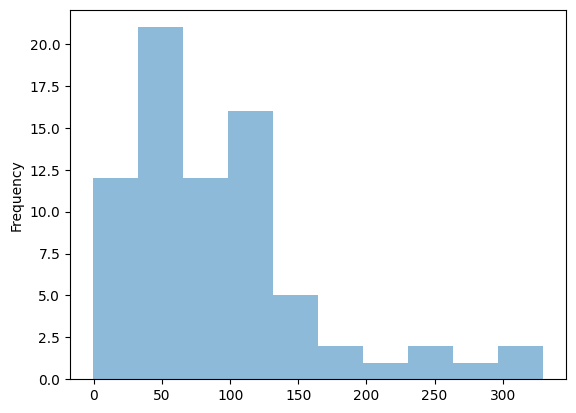

In [67]:
df['Potassium'].plot.hist(alpha = 0.5)
#El punto y coma impide que se escriba en pantalla el objeto de Matplotlib.

<Axes: ylabel='Frequency'>

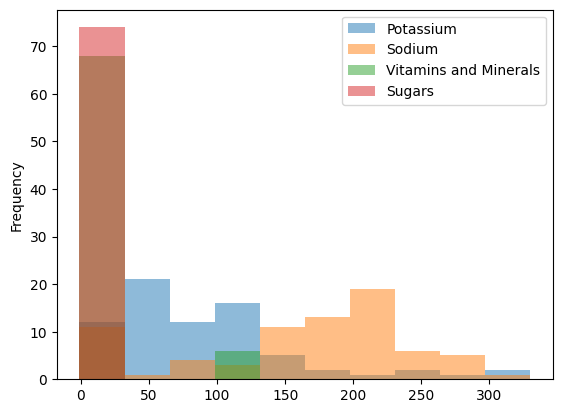

In [70]:
# Nota: Esta forma de indexado se verá en detalle en la siguiente guía.
df[['Potassium', 'Sodium', 'Vitamins and Minerals', 'Sugars']].plot.hist(alpha = 0.5)

### **7.2. Gráfica de líneas**
---
Una **gráfica de líneas** es la representación de la evolución de una variable numérica en relación a otra variable ordenada, comúnmente, en el tiempo. Permite identificar patrones o tendencias en los datos y comparar la evolución de varias variables.

Se puede generar una gráfica de líneas con el siguiente método:

> **`df.plot.line(x, y)`**

Las gráficas de líneas requieren de por lo menos dos variables numéricas que representen la posición de cada eje. Estas variables se pasan como argumento con el nombre de la etiqueta de sus columnas correspondientes. La primera corresponde al eje x. El segundo argumento acepta múltiples variables, en forma de lista o arreglo, que producirán líneas independientes superpuestas.

In [71]:
x = np.linspace(0, 1, 100)
y = np.random.randn(100).cumsum()
z = np.random.randn(100).cumsum()

df_line = pd.DataFrame({'x': x,
                   'y': y,
                   'z': z})

df_line

,x,y,z
0,0.000000,-1.294085,0.253816
1,0.010101,-2.332874,0.537542
2,0.020202,-0.589161,-0.874347
3,0.030303,-1.387224,-2.751216
4,0.040404,-1.357541,-3.770871
...,...,...,...
95,0.959596,6.101073,-11.199438
96,0.969697,6.557344,-10.568950
97,0.979798,8.101888,-12.721443
98,0.989899,7.862219,-14.186559


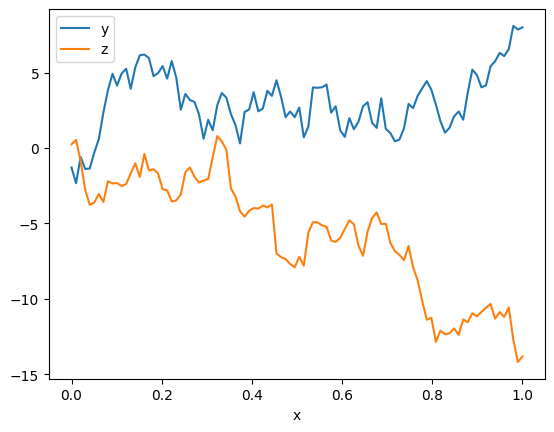

In [72]:
df_line.plot.line('x', ['y', 'z']);

### **7.3. Gráfica de dispersión o *Scatter***
---
Un **diagrama de dispersión** (***scatter plot*** en inglés) es una representación espacial de la relación entre dos variables. Es usada principalmente para identificar e ilustrar relaciones lineales y no lineales entre variables cuantitativas.

Se puede generar un diagrama de dispersión con el siguiente método:

> **`df.plot.scatter(x, y, s, c)`**

Las gráficas de dispersión requieren los mismos argumentos que las gráficas de líneas. El primer argumento se interpreta como el argumento de referencia usado en el eje x. El segundo argumento se interpreta como la variable que representa el eje vertical.

El argumento **`s`** permite definir el radio de los círculos de cada punto.
El argumento **`c`** permite definir el color de cada punto. Se puede usar una variable para codificar el radio o el color de los puntos.


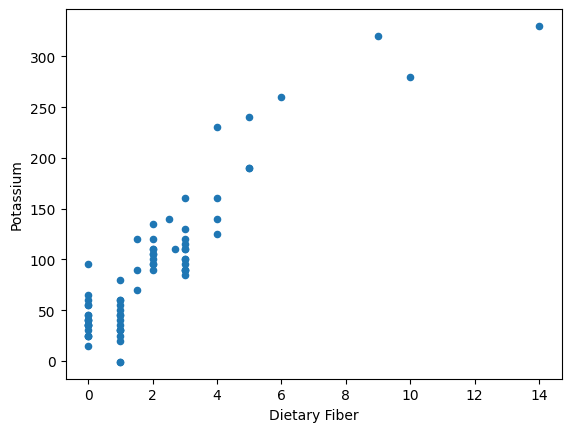

In [73]:
df.plot.scatter('Dietary Fiber', 'Potassium');

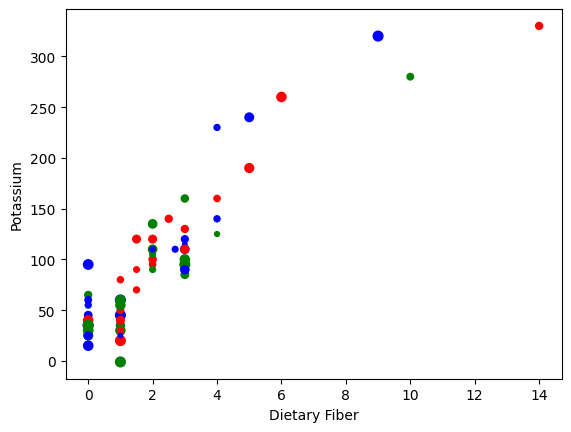

In [74]:
z = np.random.randint(10, 50, len(df))
c = pd.Series(['red', 'blue', 'green']).sample(len(df), replace = True)

df.plot.scatter('Dietary Fiber', 'Potassium',
                 s = z, # Se pueden usar series/arreglos independientes como parámetros.
                 c = c);

### **7.4. Gráfica de barras**
---
Una **gráfica de barras** es una representación de la frecuencia y distribución de variables categóricas. Se usa principalmente para hacer comparaciones de magnitud entre variables por cada categoría identificada.

Se puede generar una gráfica de barras con el siguiente método:

> **`df.plot.bar(x, y)`**

En este caso, el primer argumento será interpretado como una variable categórica, donde cada categoría representa una barra distinta. Para el segundo argumento se permiten varias variables cuantitativas en forma de lista, que representarán la magnitud o longitud vertical de la barra.



In [ ]:
df_means = df.groupby('Manufacturer').mean()

df_means

In [76]:
#Si x no se indica, se usa el índice del DataFrame.

df_means.plot.bar(y = ['Calories', 'Potassium', 'Sodium']);

NameError: name 'df_means' is not defined

### **7.5. Diagrama de cajas**
---

Un **diagrama de cajas** es la representación que muestra a simple vista la mediana, los cuartiles, el mínimo, el máximo y el rango. También puede representar los valores atípicos.

Se puede generar un diagrama de cajas con el siguiente método:

> **`df.plot.box(by)`**

El argumento **`by`** recibe las columnas que se van a usar para construir diagramas de cajas independientes. Cada variable cuantitativa en la lista tiene una representación propia.


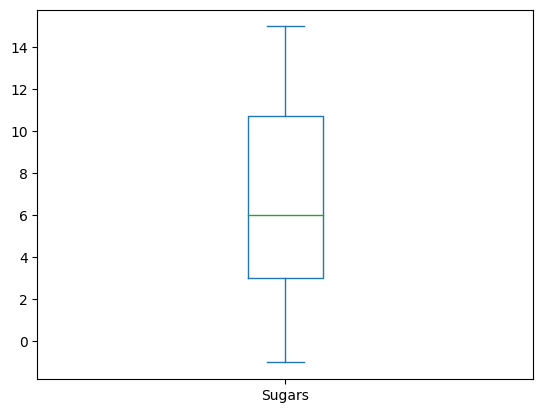

In [92]:
df['Sugars'].plot.box();

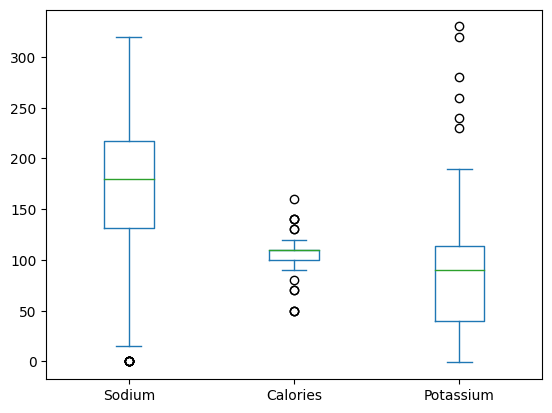

In [93]:
# Los puntos representan valores atípicos en la distribución.

df[['Sodium', 'Calories', 'Potassium'] ].plot.box();

### **7.6. Gráfica circular**
---

Una **gráfica circular** o de torta es una representación de las proporciones o porcentajes de los valores en una variable categórica. Permite visualizar de forma sencilla la proporción numérica de los posibles valores de una variable. A pesar de ser muy popular, existen otras representaciones más efectivas para conseguir el objetivo deseado como los diagramas de barras.

Se puede generar una gráfica circular con el siguiente método:

> **`df.plot.pie(y)`**

El argumento **`y`** recibe la columna a graficar. Con esta columna, se graficarán los segmentos de la gráfica por cada índice o registro en el objeto.

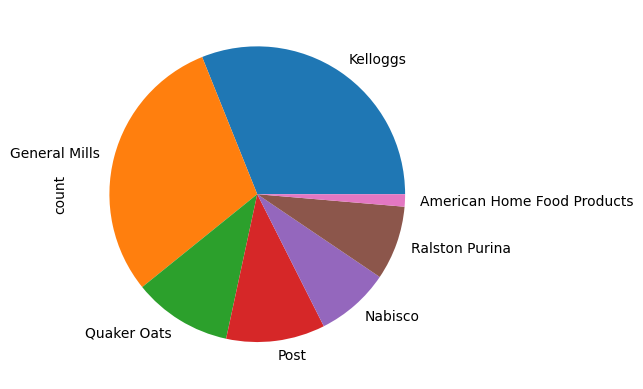

In [94]:
df['Manufacturer'].value_counts().plot.pie();

### **7.7. Gráfica de áreas**
---

Una **gráfica de áreas** o de **áreas apiladas** es una representación de la proporción o magnitud de varias variables en relación a una variable ordenada, como el tiempo. Es usada para comparar la evolución y magnitud de variables.

Se puede generar una gráfica de áreas con el siguiente método:

> **`df.plot.area(x, y)`**

Al igual que en las gráficas de líneas y de dispersión, las gráficas de áreas reciben como primer argumento una variable de control para el eje **x** y una o más variables como segundo argumento.


In [95]:
x = np.linspace(0, 1, 100)
y = np.random.randint(0, 10, 100).cumsum()
z = np.random.randint(0, 25, 100).cumsum()
w = np.random.randint(0, 50, 100).cumsum()


df_area = pd.DataFrame({'x': x,
                   'y': y,
                   'z': z,
                   'w': w})

df_area

,x,y,z,w
0,0.000000,9,11,40
1,0.010101,15,28,72
2,0.020202,20,29,103
3,0.030303,27,40,133
4,0.040404,30,62,147
...,...,...,...,...
95,0.959596,446,1232,2703
96,0.969697,448,1251,2730
97,0.979798,450,1265,2733
98,0.989899,451,1288,2738


<Axes: xlabel='x'>

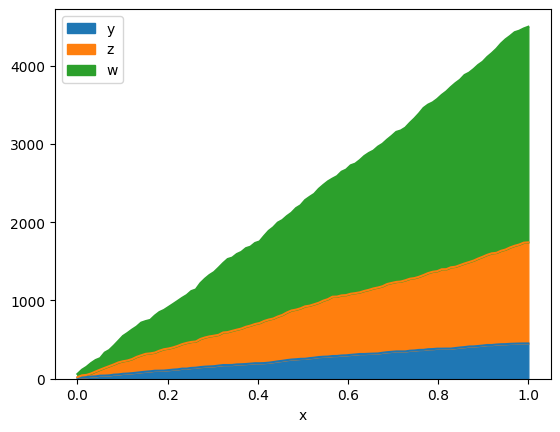

In [96]:
df_area.plot.area('x', ['y', 'z', 'w'])

### **7.8. Gráfica hexagonal**
---
Una **gráfica hexagonal** o ***hexagonal binning*** es una representación de la frecuencia de valores dentro de intervalos en dos variables distintas. Es considerada un histograma en un espacio bidimensional. Permite identificar concentraciones de valores asociados en dos variables. Es útil para datos con alta densidad.

Se puede generar una gráfica hexagonal con el siguiente método:

> **`df.plot.hexbin(x, y, gridsize)`**

La gráfica hexagonal recibe dos argumentos. En este caso, ambos representan una columna o variable única. Además, se pueden definir funciones para la reducción de los valores de cada *bin*, o definir la cantidad de *bins* por eje con el argumento **`gridsize`**.


In [97]:
x = np.random.randn(1000) + 5
y = 3 + 1.25 * x + 1.5 * np.random.randn(1000)


df_hex = pd.DataFrame({'x': x,
                   'y': y,})

df_hex

,x,y
0,4.656922,9.540250
1,6.405311,10.780032
2,4.652848,9.420691
3,4.492217,7.940391
4,6.906119,11.587387
...,...,...
995,4.795905,11.675573
996,4.429617,8.729089
997,6.008036,11.344181
998,4.303140,11.631288


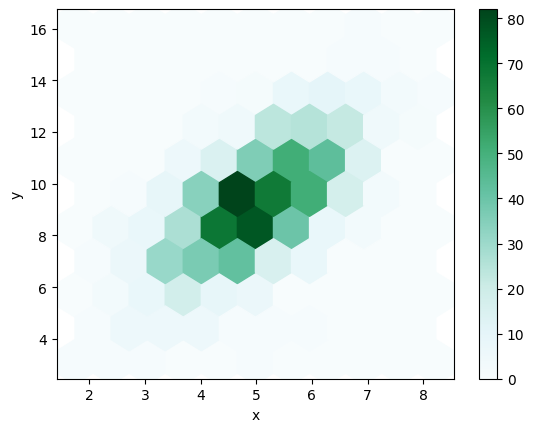

In [98]:
df_hex.plot.hexbin('x', 'y', gridsize=10);

## **Recursos adicionales**
---

En este material se consideran algunas de las funciones más comunes, pero quedan muchas otras fuera de alcance. Lo invitamos a que consulte la [documentación oficial](https://pandas.pydata.org/pandas-docs/stable/reference/index.html), y en especial la [Guía de usuario](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) de *pandas*.

Además, a continuación se presenta una lista de recursos adicionales que le podrán ser de utilidad:

*  [University of California San Diego. Coursera - Machine Learning With Big Data](https://www.coursera.org/learn/big-data-machine-learning)
*  [Data vedas - Exploración y preparación de los datos](https://www.datavedas.com/data-exploration-and-preparation/)
*  [Kaggle - Pandas](https://www.kaggle.com/learn/pandas)
*  [CodeCademy - Learn Data Analysis with Pandas](https://www.codecademy.com/learn/data-processing-pandas)
*  [University of Michigan. Coursera - Applied Data Science with Python Specialization](https://www.coursera.org/specializations/data-science-python)

## **Créditos**
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
  - Alberto Nicolai Romero Martínez
  - Miguel Angel Ortiz Marín

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*